<a href="https://colab.research.google.com/github/primasr/TugasTeknologiMultimedia/blob/main/Lossless_vs_Lossy_Tekmul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

def showImage(img):
    plt.imshow(img, cmap="gray")
    plt.xticks([]),plt.yticks([])
    plt.show()

In [109]:
# SRC: https://www.kaggle.com/lifa08/run-length-encode-and-decode
def rle_encode(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = img.T.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

def rle_decode(mask_rle, shape):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background
    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0] * shape[1], dtype=np.uint8)

    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)

In [110]:
# New version
def rle_encode_less_memory(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    This simplified method requires first and last pixel to be zero
    '''
    pixels = img.T.flatten()
    
    # This simplified method requires first and last pixel to be zero
    pixels[0] = 0
    pixels[-1] = 0
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 2
    runs[1::2] -= runs[::2]
    
    return ' '.join(str(x) for x in runs)

(592, 392)


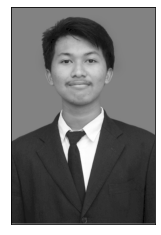

In [111]:
#im = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (64, 64))
#plt.imshow(im)

im = cv2.imread('FOTO IJAZAH.png',0)
plt.imshow(im, interpolation='nearest',cmap='gray')
plt.imsave('im_awal.png', im, cmap="gray")

print(im.shape)

showImage(im)


(592, 392)


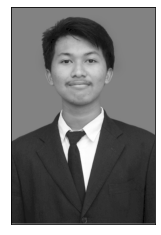

In [112]:
# rle encode
rle = rle_encode(im)

plt.imshow(im, interpolation='nearest',cmap='gray')
plt.imsave('im_rle.png', im, cmap="gray")

print(im.shape)

showImage(im)

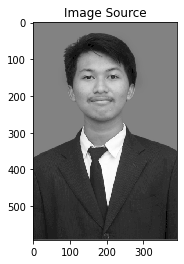

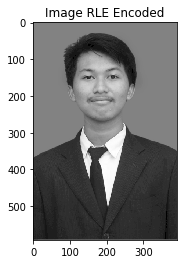

Memory size BnW Before :  99058  bytes
Memory size BnW After  :  99058  bytes
Compression ratio BnW Before - BnW After:  0.00000 %
MSE:  0.0
PSNR:  100  dB
SNR:  1.9965086545922395  dB
SNR:  1.9965086545922395  dB


In [117]:
# read file
hehe1 = cv2.imread('im_awal.png')
hehe2 = cv2.imread('im_rle.png')

# show result
plt.subplot(1,2,1)
plt.title("Image Source")
plt.imshow(hehe1, interpolation='nearest',cmap='gray')
plt.show()

plt.subplot(1,2,2)
plt.title("Image RLE Encoded")
plt.imshow(hehe2, interpolation='nearest',cmap='gray')
plt.show()

# size ratio
import os
msize_awal = os.path.getsize('im_awal.png')
msize_akhir = os.path.getsize('im_rle.png')
print("Memory size BnW Before : ",msize_awal," bytes")
print("Memory size BnW After  : ",msize_akhir," bytes")

# compression ratio BnW
bnw_fix = ((msize_awal - msize_akhir)*100)/msize_awal
formatted_ratio_bnw = "{:.5f}".format(bnw_fix)
print("Compression ratio BnW Before - BnW After: ", formatted_ratio_bnw, "%")

# show MSE
import numpy as np
print("MSE: ", np.square(np.subtract(hehe1,hehe2)).mean())

# PSNR function
from math import log10, sqrt
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

print("PSNR: ", PSNR(hehe1,hehe2), " dB")

#SNR function
import scipy.io
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

print("SNR: ", signaltonoise(hehe1).flatten().mean(), " dB")
print("SNR: ", signaltonoise(hehe2).flatten().mean(), " dB")